# Emotion Recognition using ECG Signals
----------------------------------------------------------------
`Team Number: 02`

----------------------------------------------------------------

`Team Members:`

- `CS20B1016`: V Nagasai
- `EC20B1002`: T Dheeraj
- `EC20B1058`: C Ramasai

----------------------------------------------------------------

## Interpretation

In [121]:
from data import raw_df, plot_signals,happy_data, anger_data, neutral_data, mixed_data, disgust_data, surprised_data

**HAPPY**: Signal scatters on different levels

<Figure size 640x480 with 0 Axes>

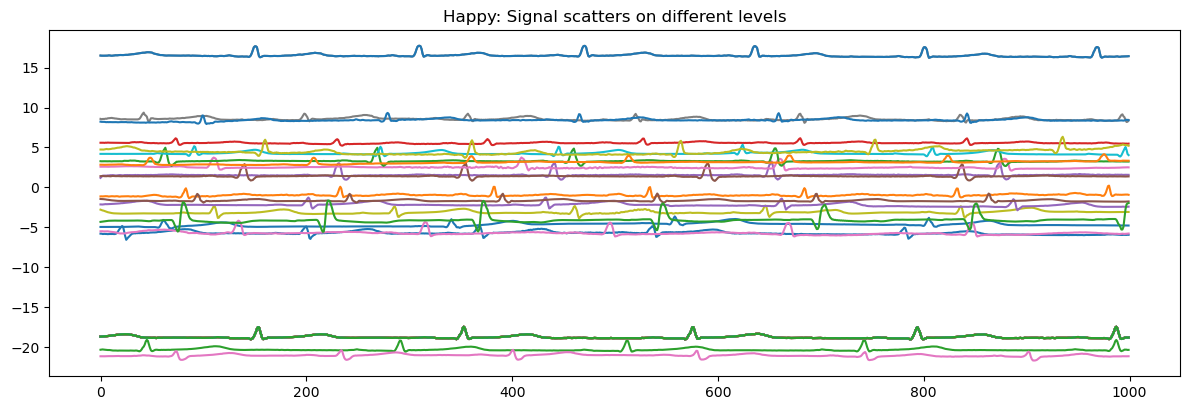

In [122]:
plot_signals(df=happy_data, title="Happy: Signal scatters on different levels")

**ANGER**: Signals scatters on different levels

<Figure size 640x480 with 0 Axes>

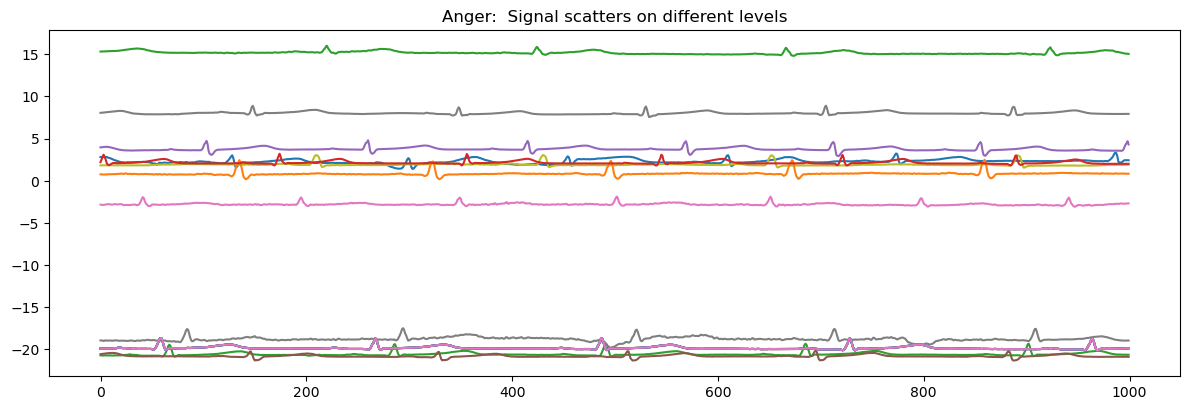

In [123]:
plot_signals(df=anger_data, title="Anger:  Signal scatters on different levels")

**NEUTRAL**: Signals above 0 region are scattered. Some are on -15 to -20 area.

<Figure size 640x480 with 0 Axes>

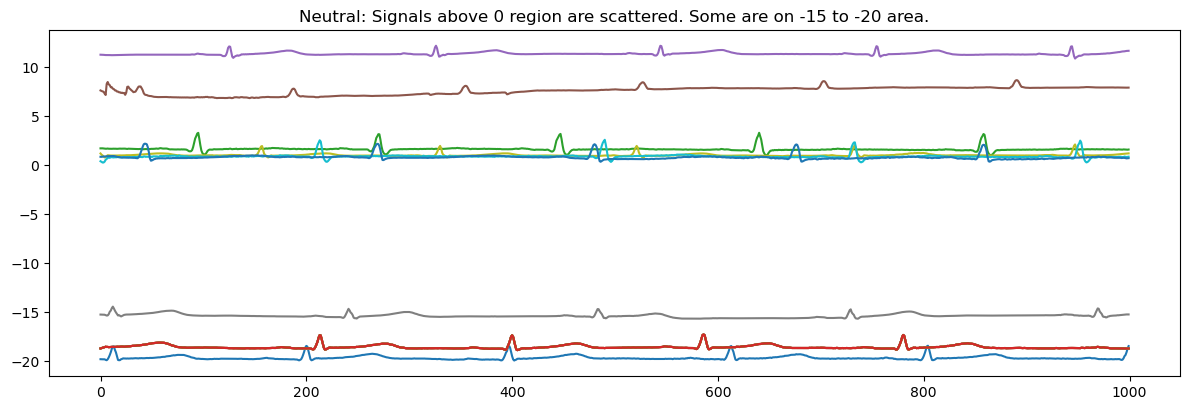

In [124]:
plot_signals(df=neutral_data, title="Neutral: Signals above 0 region are scattered. Some are on -15 to -20 area.")

**MIXED**: Most signals reside on zero level

<Figure size 640x480 with 0 Axes>

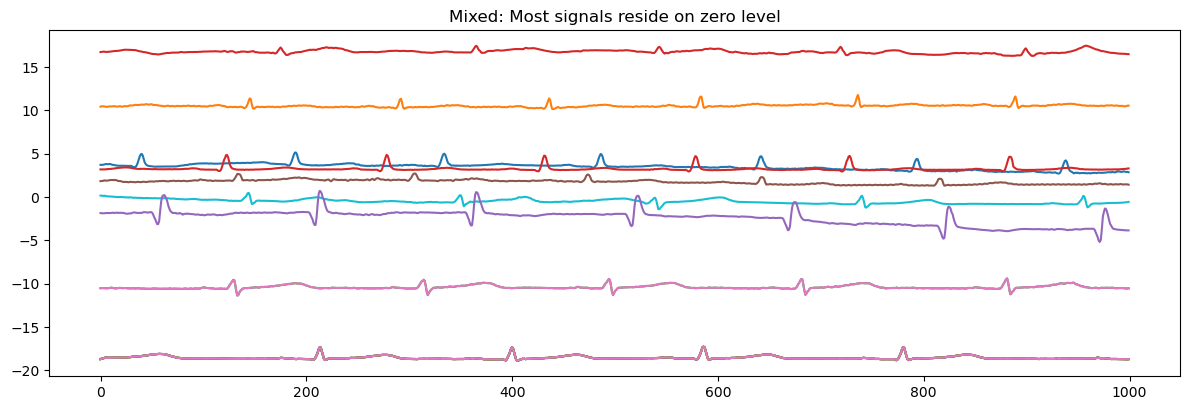

In [125]:
plot_signals(df=mixed_data, title="Mixed: Most signals reside on zero level")

**DISGUST**: Signals are on 0-5 region and a lot on -20 level

<Figure size 640x480 with 0 Axes>

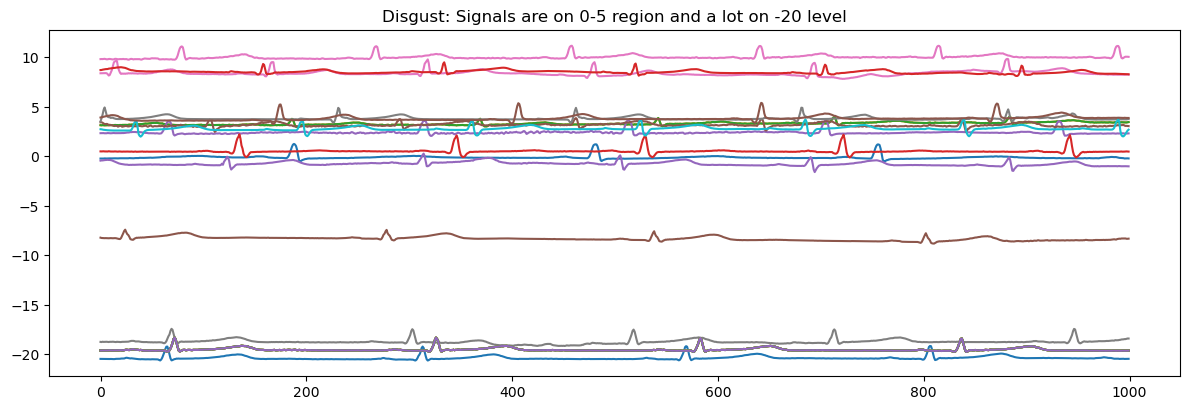

In [126]:
plot_signals(df=disgust_data, title="Disgust: Signals are on 0-5 region and a lot on -20 level")

**SURPRISED**: Signals are similar and residing near zero region

<Figure size 640x480 with 0 Axes>

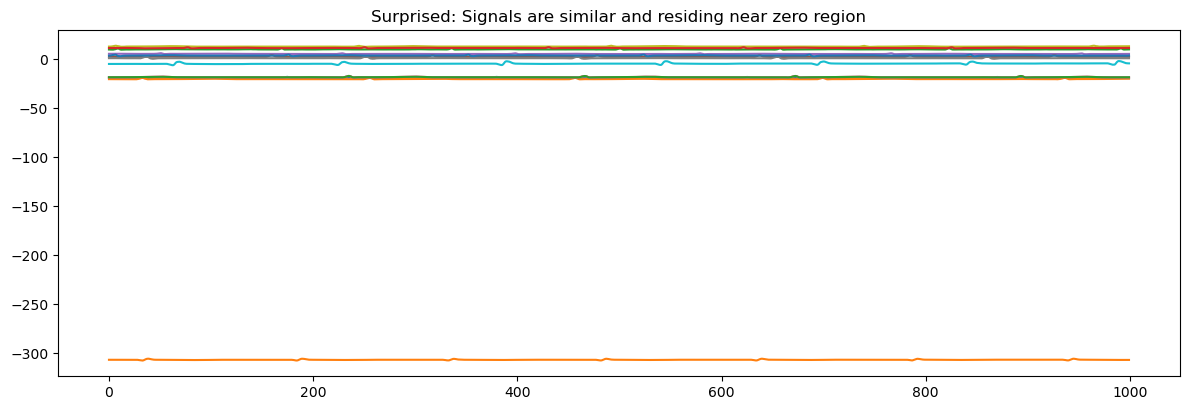

In [127]:
plot_signals(df=surprised_data, title="Surprised: Signals are similar and residing near zero region")

## Model training and classification

In [128]:
import numpy as np



train_df = raw_df.copy().drop(['Video ID', 'Happy', 'Sad', 'Fear',
                                        'Anger', 'Neutral', 'Disgust', 'Surprised', 'Four label', 'Modal'
                                       ], axis = 1)
train_df.rename(columns = {'Raw Data':'feature', 'Emotion':'emotion'}, inplace = True)
train_df.head()

,feature,Participant ID,Session ID,Name,Age,Gender,Valence level,Arousal level,Dominance level,Familiarity Score,emotion,Valence,Arousal,Target Emotion
0,"[-20.464, -20.466, -20.469, -20.47, -20.463, -...",10,3,S_D,8,Male,1,7,0,Never watched,Disgust,LV,HA,disgust
1,"[-19.613, -19.619, -19.608, -19.615, -19.605, ...",10,2,S_D,8,Male,0,9,0,Never watched,Mixed,LV,HA,disgust
2,"[2.732, 2.7337, 2.7454, 2.754, 2.7657, 2.7899,...",12,3,Q_M,11,Male,2,3,3,Never watched,Fear,LV,LA,fear
3,"[-20.438, -20.445, -20.428, -20.428, -20.417, ...",12,2,Q_M,11,Male,4,4,5,Never watched,Fear,LV,LA,fear
4,"[3.1466, 3.1346, 3.1535, 3.139, 3.1332, 3.1397...",8,3,B_R,12,Female,0,9,9,Never watched,Disgust,LV,HA,disgust


In [129]:
from preprocess import calc_rmssd, calc_avrr, calc_sdrr, calc_skew, calc_kurt, calc_NNx, calc_pNNx, calc_SD1, calc_SD2, calc_CSI, calc_CVI, calc_modifiedCVI, calc_SD1overSD2, calc_meanrr, calc_medianrr, calc_hr
import pandas as pd

extract_frame = train_df.copy()

medianrr = []
meanrr = []
rmssd = []
sdrr_rmssd = []
hr = []
avrr = []
sdrr = []
skew_ = []
kurt = []
NNx = []
pNNx = []
SD1 = []
SD2 = []
CSI = []
CVI = []
modifiedCVI = []
SD1overSD2 = []
for index, row in extract_frame.iterrows():
    rmssd.append(calc_rmssd(row['feature']))
    avrr.append(calc_avrr(row['feature']))
    sdrr.append(calc_sdrr(row['feature']))
    skew_.append(calc_skew(row['feature']))
    kurt.append(calc_kurt(row['feature']))
    NNx.append(calc_NNx(pd.Series(row['feature'])))
    pNNx.append(calc_pNNx(pd.Series(row['feature'])))
    SD1.append(calc_SD1(row['feature']))
    SD2.append(calc_SD2(row['feature']))
    CSI.append(calc_CSI(row['feature']))
    CVI.append(calc_CVI(row['feature']))
    modifiedCVI.append(calc_modifiedCVI(row['feature']))
    SD1overSD2.append(calc_SD1overSD2(row['feature']))
    meanrr.append(calc_meanrr(pd.Series(row['feature'])))
    medianrr.append(calc_medianrr(pd.Series(row['feature'])))
    hr.append(calc_hr(pd.Series(row['feature'])))
    sdrrrmssd = calc_sdrr(row['feature']) / calc_rmssd(row['feature'])
    sdrr_rmssd.append(sdrrrmssd)
    

extract_frame['meanrr'] = meanrr
extract_frame['medianrr'] = medianrr
extract_frame['sdrr'] = sdrr
extract_frame['rmssd'] = rmssd
extract_frame['sdrr_rmssd'] = sdrr_rmssd
extract_frame['hr'] = hr
extract_frame['NNx'] = NNx
extract_frame['pNNx'] = pNNx
extract_frame['sd1'] = SD1
extract_frame['sd2'] = SD2
extract_frame['avrr'] = avrr
extract_frame['skew'] = skew_
extract_frame['kurt'] = kurt
extract_frame['avrr'] = avrr
extract_frame['csi'] = CSI
extract_frame['cvi'] = CVI
extract_frame['modifiedcvi'] = modifiedCVI

extract_frame = extract_frame.drop(['Valence level', 'Arousal level', 'Dominance level'], axis = 1)
extract_frame2 = extract_frame.copy()
extract_frame = extract_frame.drop(['feature', 'Target Emotion'], axis = 1)
extract_frame = extract_frame.drop(['Valence', 'Arousal'], axis = 1)
extract_frame = extract_frame.drop(['avrr', 'csi', 'cvi', 'modifiedcvi'], axis = 1)
extract_frame.head()

,Participant ID,Session ID,Name,Age,Gender,Familiarity Score,emotion,meanrr,medianrr,sdrr,rmssd,sdrr_rmssd,hr,NNx,pNNx,sd1,sd2,skew,kurt
0,10,3,S_D,8,Male,Never watched,Disgust,247.333333,248.5,0.193788,0.060668,3.194234,242.818424,0,0.0,0.042920,0.270676,3.100325,12.812462
1,10,2,S_D,8,Male,Never watched,Mixed,254.833333,254.5,0.179401,0.059484,3.015953,235.453635,0,0.0,0.042083,0.250196,3.458114,15.628498
2,12,3,Q_M,11,Male,Never watched,Fear,232.833333,235.5,0.183253,0.060949,3.006671,257.945122,0,0.0,0.043118,0.255546,1.691463,3.879814
3,12,2,Q_M,11,Male,Never watched,Fear,213.666667,213.0,0.187385,0.060258,3.109699,281.107955,0,0.0,0.042630,0.261550,3.109632,13.196109
4,8,3,B_R,12,Female,Never watched,Disgust,174.250000,172.0,0.139305,0.041048,3.393709,344.592821,0,0.0,0.029039,0.194856,1.015548,2.031559


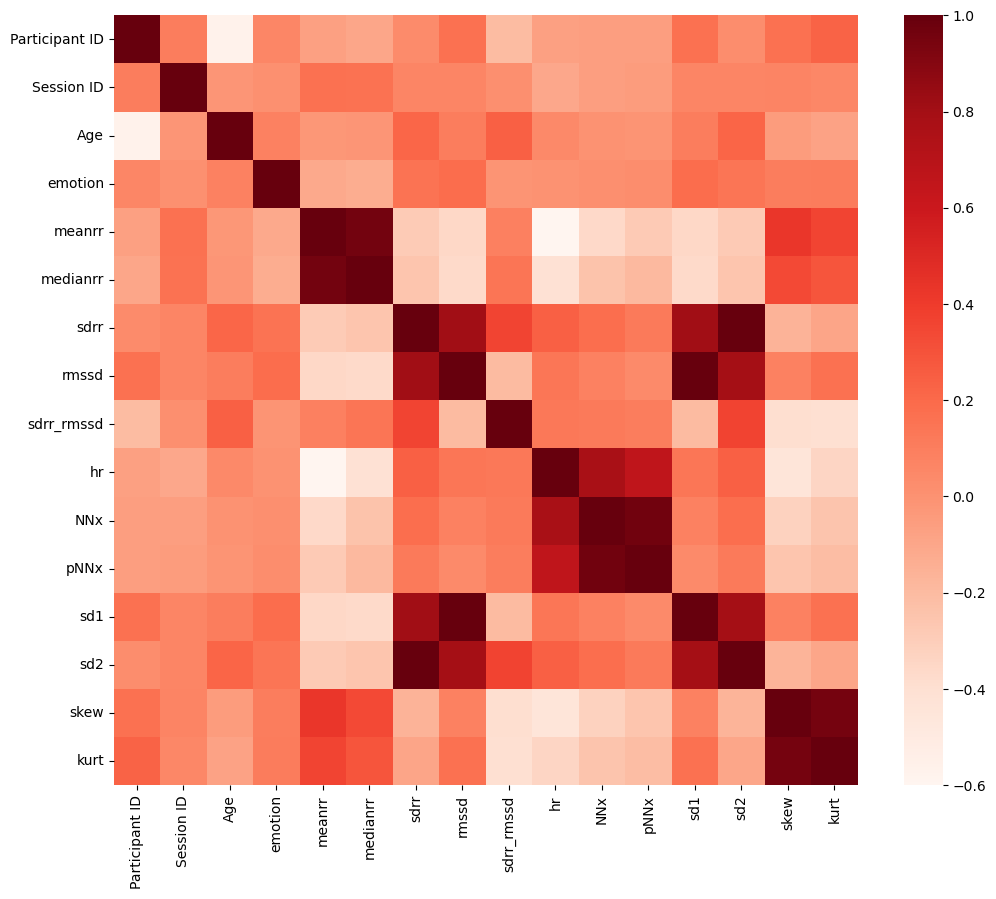

In [130]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

le = preprocessing.LabelEncoder()
le.fit(extract_frame['emotion'])
extract_frame['emotion'] = le.transform(extract_frame['emotion'])
plt.figure(figsize=(12,10))
corr = extract_frame.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

In [131]:
# Converting categorical to numerical 
extract_frame['Familiarity Score'].replace(['Never watched'], [0], inplace=True)
extract_frame['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

In [132]:
from sklearn.model_selection import train_test_split

x = extract_frame.drop(['emotion', 'Name','Participant ID', 'Session ID'],axis=1)
y = extract_frame['emotion']
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

train_x.head()

,Age,Gender,Familiarity Score,meanrr,medianrr,sdrr,rmssd,sdrr_rmssd,hr,NNx,pNNx,sd1,sd2,skew,kurt
340,10,0,0,180.700,186.5,0.162838,0.057303,2.841678,332.936769,0,0.0,0.040540,0.226691,0.130550,2.789624
64,14,1,0,219.500,221.5,0.197991,0.062261,3.180001,273.960919,0,0.0,0.044048,0.276516,2.842292,11.033996
55,10,0,0,209.625,211.0,0.218409,0.086128,2.535859,286.827294,0,0.0,0.060932,0.302807,4.083595,22.911348
106,10,0,0,157.100,150.0,0.152693,0.052408,2.913525,384.531757,0,0.0,0.037077,0.212733,2.433095,9.709503
300,10,0,0,205.125,202.0,0.170359,0.066427,2.564614,294.090776,0,0.0,0.046994,0.236297,1.570978,5.083382


In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=12)
dt_model = dt_model.fit(train_x, train_y)
dt_pred_y = dt_model.predict(test_x)

rf_model = RandomForestClassifier()
rf_model.fit(train_x, train_y)
rfpred_y = rf_model.predict(test_x)

## Decision Tree Classifier

In [134]:
print(classification_report(test_y,dt_pred_y))

              precision    recall  f1-score   support

           0       0.15      0.40      0.22         5
           1       0.57      0.50      0.53         8
           2       0.00      0.00      0.00         1
           3       0.50      0.50      0.50        24
           4       0.41      0.39      0.40        18
           5       0.38      0.33      0.35         9
           6       0.00      0.00      0.00         6
           7       0.67      0.22      0.33         9

    accuracy                           0.38        80
   macro avg       0.33      0.29      0.29        80
weighted avg       0.43      0.38      0.38        80



# Random Forest

In [135]:
print(classification_report(test_y,rfpred_y))

              precision    recall  f1-score   support

           0       0.25      0.40      0.31         5
           1       0.67      0.25      0.36         8
           2       0.00      0.00      0.00         1
           3       0.43      0.50      0.46        24
           4       0.47      0.50      0.49        18
           5       0.27      0.33      0.30         9
           6       0.00      0.00      0.00         6
           7       0.50      0.11      0.18         9

    accuracy                           0.36        80
   macro avg       0.32      0.26      0.26        80
weighted avg       0.40      0.36      0.36        80

